In [ ]:
# Hidden layers are the layers between the inputs and the outputs
# Two layers are densely connected when all of the neruons from both layers are interconnected with each other
# Biases always have weights = 1
# We want our neural network to have the least amount of loss/cost
# The Loss Function determines how "bad" our model is

In [15]:
# CREATING A NEURAL NETWORK
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [16]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into testing and training

In [ ]:
train_images.shape # dataset included in keras that includes 60,000 (28x28) images for testing adn 10k for training

(60000, 28, 28)

In [ ]:
train_images[0,23,23] # taking a look at one pixel

194

In [ ]:
train_labels[:10] # first 10 training tables
# we have 10 different articles of clothing

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [17]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

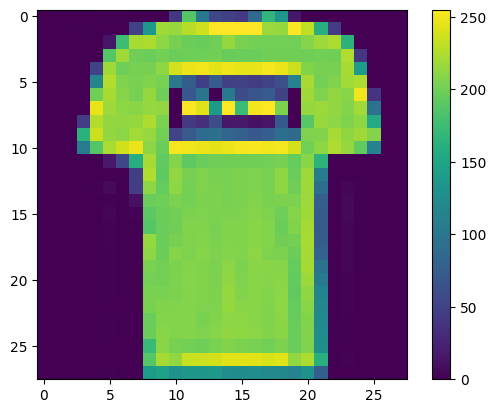

In [18]:
# showing an image with matplotlib

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# DATA PROCESSING

In [19]:
# in this case we will scale all of our greyscale pixel values (0-255) to be between 0 and 1
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
# BUILDING THE MODEL
# Sequential is the most basic form of Neural Networks (from input layer to output layer)
# (28,28) is the pixel structure per image

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
    keras.layers.Dense(128, activation="relu"), # hidden layer(2)     128 is a number we picked on our own
    keras.layers.Dense(10, activation="softmax") # hidden layer(3)    10 is the number of output neurons (=num of classes), softmax makes sure that all values [0,1]
])

In [27]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # te output from the NN we're looking for is accuracy

In [28]:
# Training the model
model.fit(train_images,train_labels,epochs=10) # keras handles the input function for us

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4949 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3350 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3101 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2814 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2570 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2467 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.239

In [31]:
# Evaluating the model (testing what we got with out testing data)
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=1)

print("Test accuracy: ",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8796
Test accuracy:  0.8795999884605408


In [ ]:
# ^ the accuracy is lower. We have an issue of overfitting
# We want our model to generalize properly and be suitable for other kinds of data
# in some situations less epochs can lead to better results

In [ ]:
# MAKING PREDICTIONS

In [32]:
test_images.shape

(10000, 28, 28)

In [35]:
predictions = model.predict(test_images)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[9.5751060e-09 2.3911733e-09 3.7821446e-10 ... 5.5010542e-02
  2.4965397e-07 9.4494867e-01]
 [3.2138396e-05 2.8229008e-14 9.9842095e-01 ... 1.5282439e-18
  9.7981943e-09 1.7334615e-15]
 [6.1146364e-09 9.9999994e-01 3.5235721e-12 ... 7.2062254e-22
  1.4085498e-13 2.5364377e-20]
 ...
 [1.9902077e-06 2.4033470e-10 2.9381221e-07 ... 3.3126106e-08
  9.9989134e-01 4.3629479e-12]
 [2.2986744e-09 9.9999887e-01 1.0458957e-10 ... 2.1415099e-16
  5.1753930e-09 3.2176321e-13]
 [7.9630830e-05 2.7354217e-08 7.6980277e-06 ... 2.7995899e-03
  1.3995634e-03 9.8621658e-06]]


In [37]:
# Every single image has a list containing its predictions
print(predictions[0]) # is the probability distribution caluclated for the first image

[9.5751060e-09 2.3911733e-09 3.7821446e-10 7.1624795e-10 2.9906561e-10
 4.0530260e-05 4.9594362e-08 5.5010542e-02 2.4965397e-07 9.4494867e-01]


In [38]:
np.argmax(predictions[0]) # getting the highest probability item

9

Ankle boot


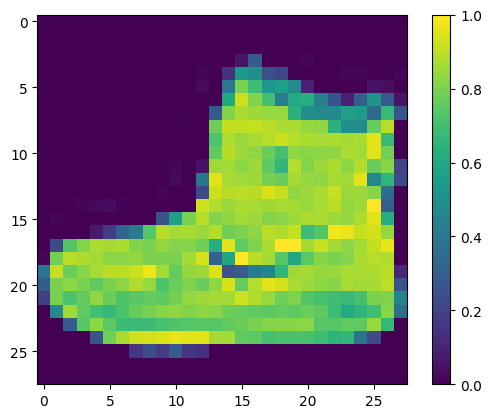

In [40]:
# ^ 9 is the Ankle Boot
# checking if it's correct:
print(class_names[np.argmax(predictions[0])]) # item's name
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# correct